In [3]:
#Import libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing dataset
ds=pd.read_csv("Social_Network_Ads.csv")
ds

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
ds.duplicated().sum()

33

In [6]:
ds.drop_duplicates(inplace=True)

In [7]:
ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
#Splitting dataset into dependenet and independent
x=ds[['Age','EstimatedSalary']]
y=ds[['Purchased']]

In [9]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [10]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [11]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [12]:
#Model selection and model fitting with train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
#Applying decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
cls=DecisionTreeClassifier(criterion='entropy',random_state=0)
cls.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

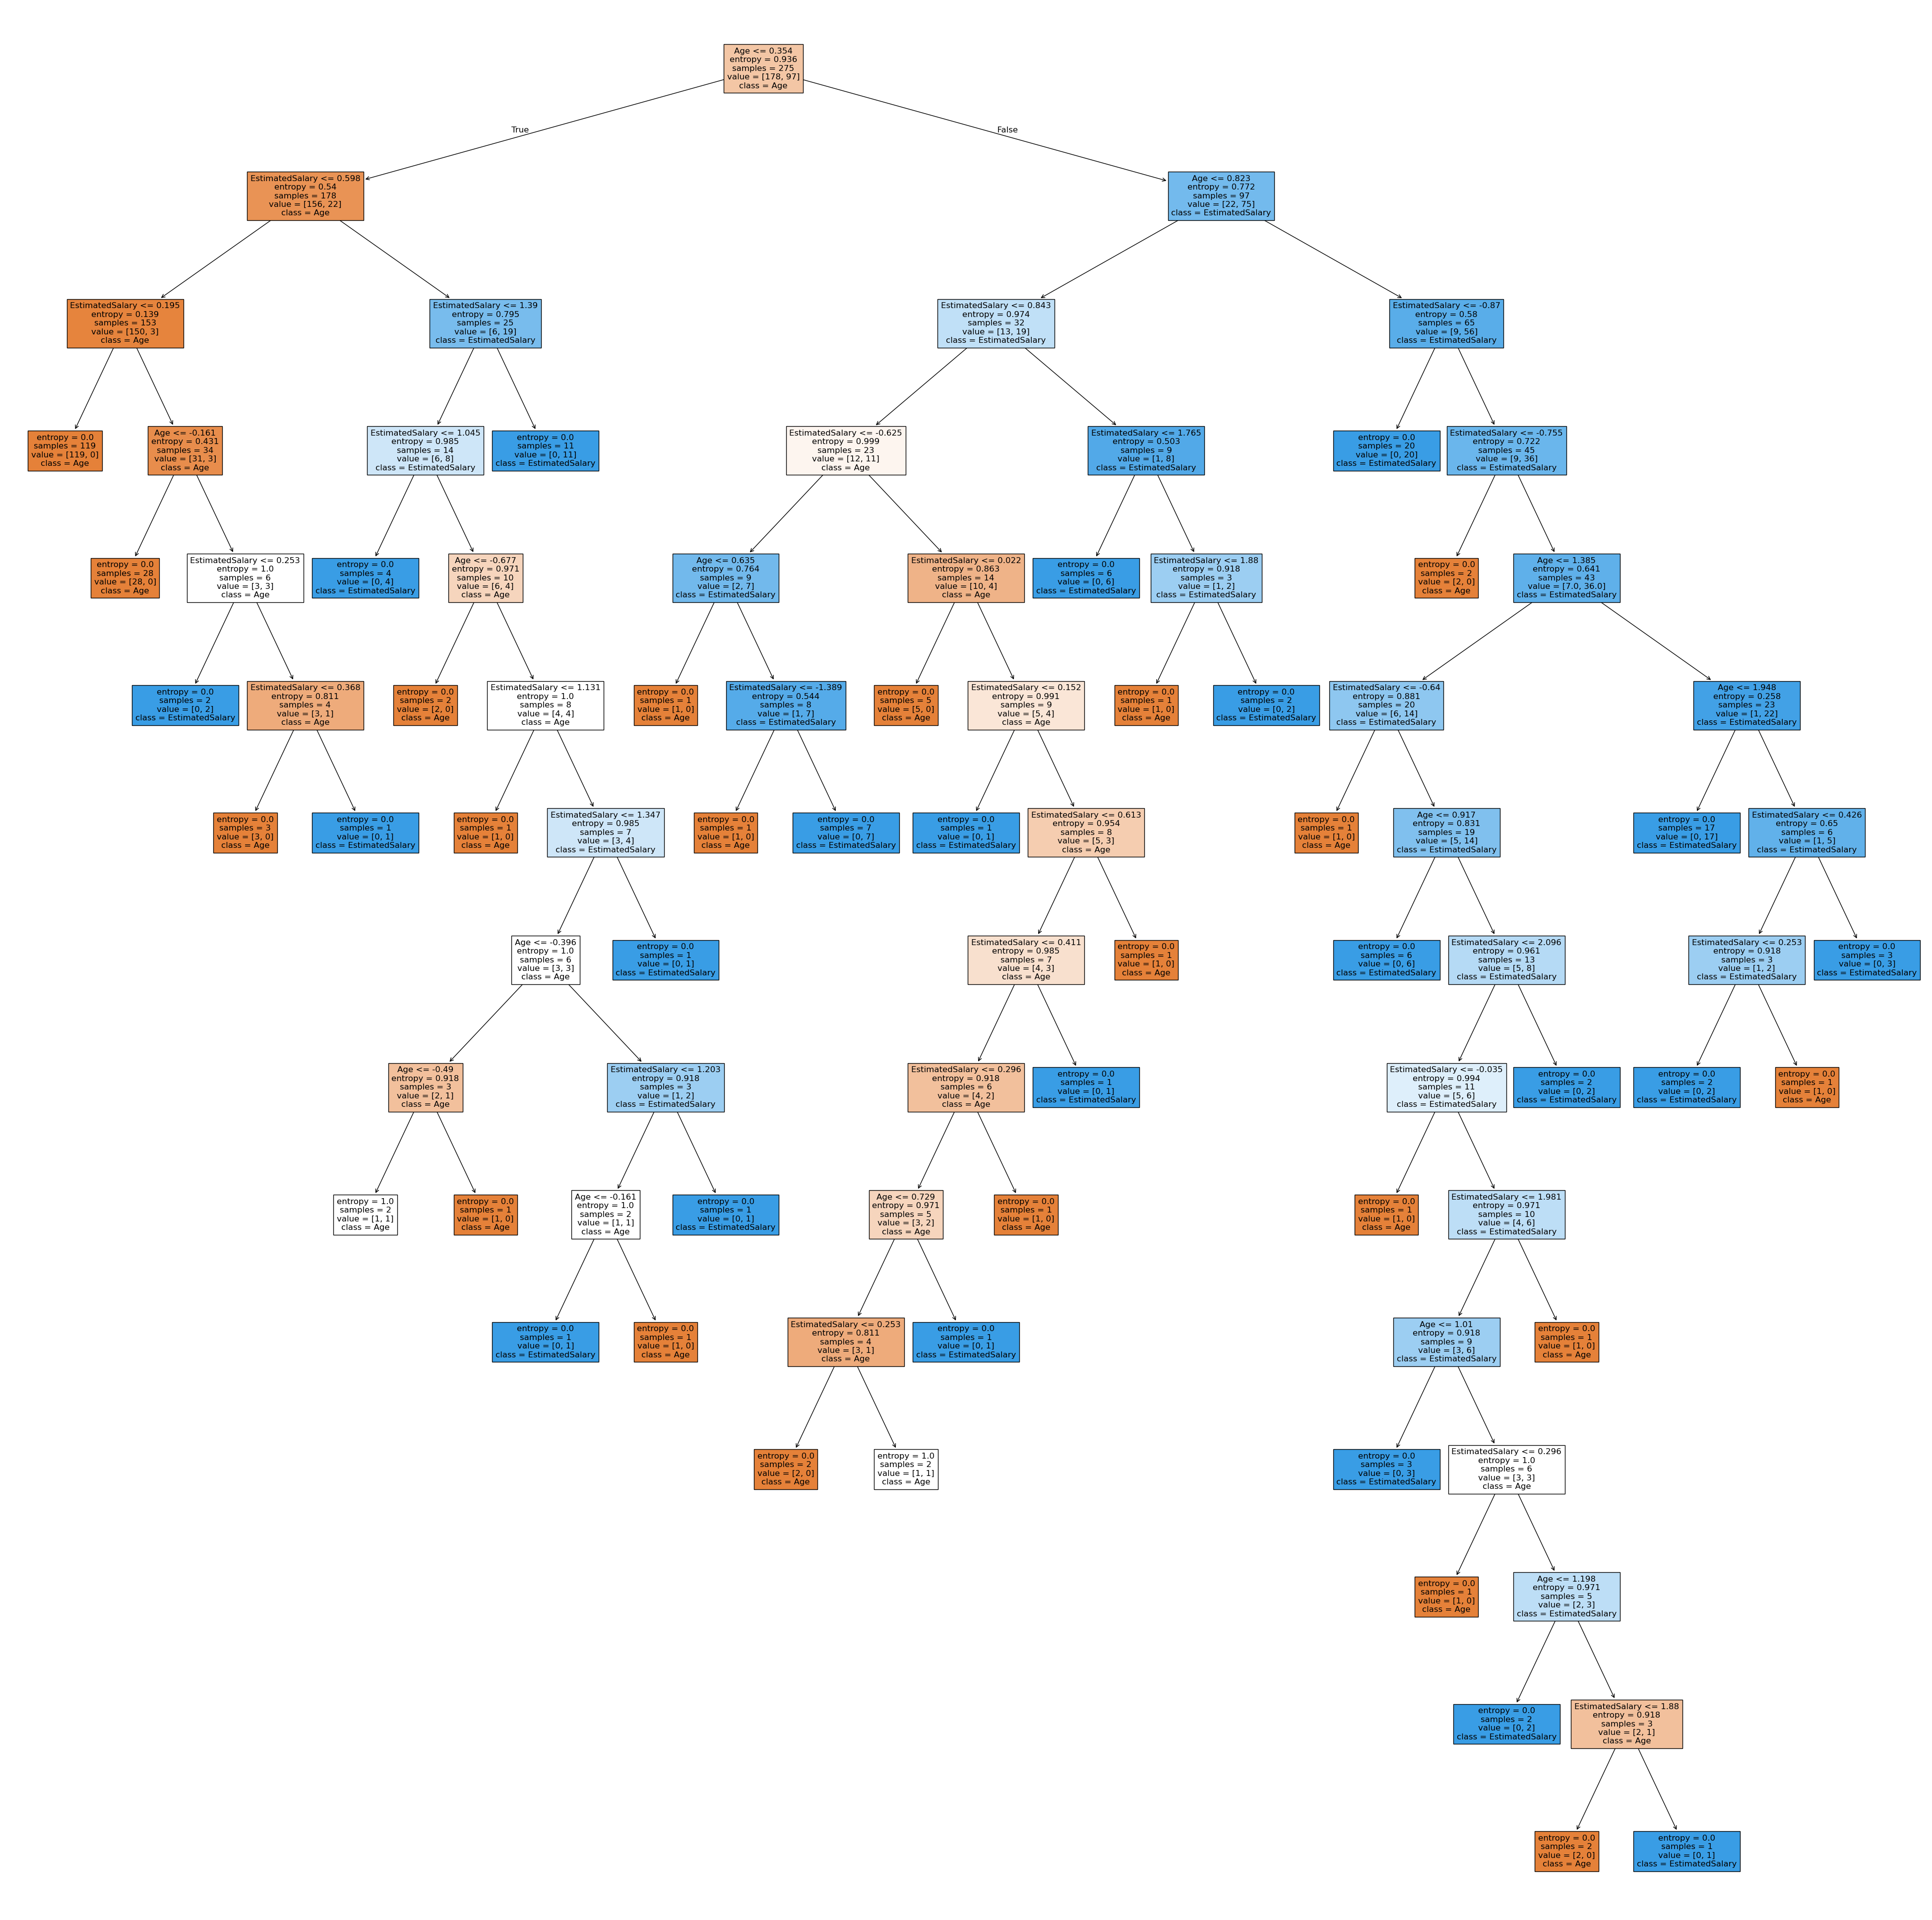

In [14]:
#Plot for decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(cls,filled=True,feature_names=['Age','EstimatedSalary'],class_names=['Age','EstimatedSalary'])
plt.show()

In [15]:
#Predict for my input
result=cls.predict(sc.transform([[30,150000]]))
result

array([1], dtype=int64)

In [16]:
#Accuracy 
from sklearn.metrics import accuracy_score
#Predict the lables for the test set
y_pred=cls.predict(x_test)
#Calculate accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy :{accuracy*100:.2f}%")

accuracy :82.61%


In [24]:
#User input
age=float(input("Enter age:"))
salary=float(input("Enter Estimated salary:"))
myinput=pd.DataFrame(sc.transform([[age,salary]]),columns=['Age','EstimatedSalary'])
result=cls.predict(myinput)
if result[0]==1:
    print("Prediction: User will purches plan")
else:
    print("Prediction: User will not purches plan")

Enter age: 30
Enter Estimated salary: 200000


Prediction: User will purches plan
